In [877]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/randomforest')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import platform
print(platform.python_version())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
3.6.9


In [878]:
DATA_DIR = "/content/gdrive/My Drive/Colab Notebooks/randomforest/"


indicator_index = 3
extractNum = 10

indicators = ['FowardCitation', 'ipc', 'claim', 'family']

datasets = pd.read_csv(DATA_DIR + 'output_'+indicators[indicator_index]+'.csv')

X = datasets.iloc[:, 1].values  
Y = datasets.iloc[:, 2].values   

print(X)
print(Y)

['method  treating  sepsis  subject  pharmaceutically  acceptable  pharmaceutically  effective  amount  two  immunoregulators  functional  fragments  functional  analogues  thereof  wherein  said  immunoregulators  comprise  peptide  recombinant  method  wherein  peptide  selected  group  consisting  seq  id  seq  id  seq  id  functional  fragment  method  treating  sepsis  subject  pharmaceutically  acceptable  pharmaceutically  effective  amount  two  immunoregulators  said  wherein  least  one  said  immunoregulators  wherein  said  tide  obtainable  mammalian  chorionic  gonadotropin  preparation  synthetic  peptide  analogue  method  according  wherein  peptide  selected  group  consisting  seq  id  seq  id  seq  id  functional  fragment  method  according  wherein  immunoregulators  selected  group  immunoregulators  consisting  seq  id  seq  id  seq  id  functional  fragment  method  according  wherein  one  said  immunoregulators  human  chorionic  method  according  wherein  p

In [0]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [880]:

from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer = TfidfVectorizer()
X_Train = vectorizer.fit_transform(X_Train)
X_Test = vectorizer.transform(X_Test)


# Fitting the classifier into the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
# n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아집니다.
classifier.fit(X_Train,Y_Train)

print("훈련 세트 정확도: {:.3f}".format(classifier.score(X_Train, Y_Train)))
print("테스트 세트 정확도: {:.3f}".format(classifier.score(X_Test, Y_Test)))

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)
print(Y_Pred)

voca = vectorizer.vocabulary_
voca_list = []
index = 0
for val in list(voca.keys()):
  voca_list.append(list(voca.keys())[list(voca.values()).index(index)])
  index += 1


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.333
['1' '1' '1']


In [0]:
# 각각의 특허를 분석하여 indicator에 어떠한 단어들이 중요한 영향을 끼치는지 파악한다.
# 즉 각 indicator 마다 중요한 영향을 끼치는 단어들을 추출한다.
# 데이터들을 Train : Test = 3 : 1 의 비율로 나눈 뒤에 
# Test 데이터로 결과를 내어 indicator가 높은 수치의 문서들 중 영향도가 높은 단어를 추출한다.

# 각 단어들과 indicator를 통해 시각화를 진행한다.

# get importances from RF
importances = classifier.feature_importances_
# then sort them descending
indices = np.argsort(importances)
# get the features from the original data set
features = []
for val in indices:
  features.append(voca_list[val])

# max = -1
# maxIndex = 0
# index = 0
# for imports in importances:
#   if max < imports:
#     max = imports
#     maxIndex = index
#   index += 1

# print('importances: ', max)
# print('maxIndex: ', maxIndex)
# print('text: ', voca_list[maxIndex])

indices = indices[len(indices)-extractNum:len(indices)]
features = features[len(features)-extractNum:len(features)]



In [882]:
/

()

['selected', 'comprising', 'claimed', 'least', 'active', 'effect', 'consisting', 'substituted', 'hours', 'comprises']
[0.019835852591503174, 0.01959994675454236, 0.01849438481662931, 0.016949387244459022, 0.014775732057948694, 0.014366176797479164, 0.014087394721279246, 0.013367003065186872, 0.011615687219754601, 0.011518712520614986]


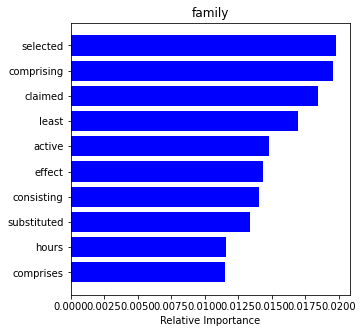

In [883]:
# plot them with a horizontal bar chart
# plt.figure(1)
plt.figure(figsize=(5,5))
plt.title(indicators[indicator_index])
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')

features.reverse()
print(features)
importances_list = []
for index in indices:
  importances_list.append(importances[index])
importances_list.reverse()
print(importances_list)